#### EG/2020/4076  
#### Minhaj MHA
#### Take Home Assignment 02

# Question 01

#### Step 1: Add Gaussian Noise and Implement Otsu's Thresholding

In [36]:
# Required Libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt


#### Function to Add Gaussian Noise to an RGB Image

In [37]:
def add_gaussian_noise_rgb(image, mean=0, sigma=20):
    """
    Adds Gaussian noise to each channel of the RGB image.
    
    Parameters:
    - image: Input RGB image (numpy array).
    - mean: Mean of the Gaussian noise.
    - sigma: Standard deviation of the Gaussian noise.
    
    Returns:
    - noisy: Noisy image.
    """
    noisy = image.astype(np.int16)  # Prevent overflow
    for c in range(3):
        noise = np.random.normal(mean, sigma, image.shape[:2]).astype(np.int16)
        noisy[:, :, c] += noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy


#### Function to Perform Otsu's Thresholding (Manual Implementation)

In [38]:
def otsu_threshold(image):
    """
    Computes Otsu's threshold for a grayscale image.
    
    Parameters:
    - image: Single-channel grayscale image (numpy array).
    
    Returns:
    - thresh: Optimal threshold value computed using Otsu's method.
    """
    hist = np.bincount(image.flatten(), minlength=256)
    total = image.size
    sum_total = np.dot(np.arange(256), hist)
    
    wB, muB = 0, 0
    wF, muF = 1, sum_total / total
    max_var, thresh = 0, 0

    for t in range(256):
        p_t = hist[t] / total
        wBn, wFn = wB + p_t, wF - p_t

        if wBn > 0:
            muB = (muB * wB + t * p_t) / wBn
        if wFn > 0:
            muF = (muF * wF - t * p_t) / wFn

        wB, wF = wBn, wFn
        var_between = wB * wF * (muB - muF)**2

        if var_between > max_var:
            max_var, thresh = var_between, t

    return thresh


### Step 2: Visualizing the Original Image

(-0.5, 597.5, 449.5, -0.5)

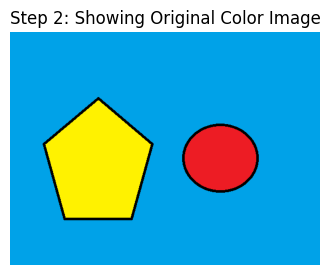

In [63]:

color_img = cv2.imread('original_image.png', cv2.IMREAD_COLOR)  # Load the image using OpenCV
img_dis = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)   # Convert from BGR (OpenCV default) to RGB

# Plotting the image
plt.figure(figsize=(4, 4))
plt.imshow(img_dis)
plt.title("Step 2: Showing Original Color Image")
plt.axis("off")


### Step 3: Add and Display Gaussian Noise

(-0.5, 597.5, 449.5, -0.5)

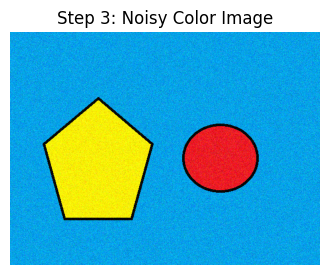

In [64]:

noisy_color = add_gaussian_noise_rgb(color_img)

plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(noisy_color, cv2.COLOR_BGR2RGB))
plt.title("Step 3: Noisy Color Image")
plt.axis("off")


### Step 4: Convert Noisy Image to Grayscale

(-0.5, 597.5, 449.5, -0.5)

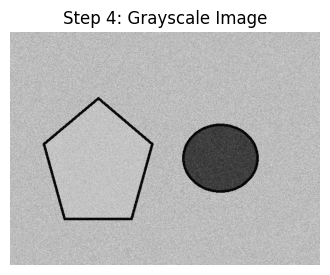

In [65]:

gray = cv2.cvtColor(noisy_color, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(4, 4))
plt.imshow(gray, cmap='gray')
plt.title("Step 4: Grayscale Image")
plt.axis("off")


#### Step 5: Histogram of the Grayscale Image

Text(0.5, 1.0, 'Step 5: Histogram of Grayscale')

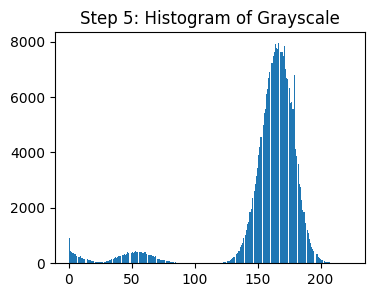

In [66]:

plt.figure(figsize=(4, 3))
plt.hist(gray.ravel(), bins=256)
plt.title("Step 5: Histogram of Grayscale")


#### Step 6: Compute Otsu's Threshold

In [67]:

t = otsu_threshold(gray)
print(f"Step 6: Computed Otsu Threshold = {t}")


Step 6: Computed Otsu Threshold = 101


#### Step 7: Apply Otsu Threshold to Create Binary Image

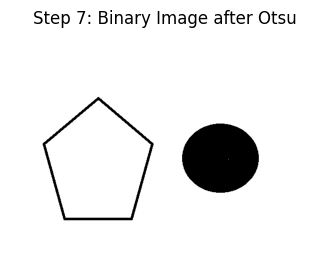

In [68]:

binary = (gray > t).astype(np.uint8) * 255
plt.figure(figsize=(4, 4))
plt.imshow(binary, cmap='gray')
plt.title("Step 7: Binary Image after Otsu") 
plt.axis("off")
plt.show()


# Question 2

#### Step 1: Region Growing Based on Color Similarity

In [69]:
def region_growing_color(img, seeds, tol):
    h, w, _ = img.shape
    mask = np.zeros((h, w), dtype=np.uint8)
    visited = np.zeros((h, w), dtype=bool)
    queue = list(seeds)
    
    for x, y in seeds:
        mask[x, y] = 255
        visited[x, y] = True
    
    while queue:
        x, y = queue.pop(0)
        current = img[x, y].astype(int)
        for dx in (-1, 0, 1):
            for dy in (-1, 0, 1):
                xn, yn = x + dx, y + dy
                if 0 <= xn < h and 0 <= yn < w and not visited[xn, yn]:
                    neigh = img[xn, yn].astype(int)
                    if np.linalg.norm(neigh - current) <= tol:
                        mask[xn, yn] = 255
                        queue.append((xn, yn))
                    visited[xn, yn] = True
    return mask


#### Step 2: Load and Display the Original Image

(-0.5, 597.5, 449.5, -0.5)

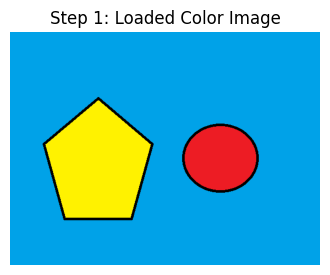

In [70]:

image_path = 'original_image.png'  
img_color_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
if img_color_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
img_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title("Step 1: Loaded Color Image")
plt.axis('off')


#### Step 3: Display Seed Points on the Image

(-0.5, 597.5, 449.5, -0.5)

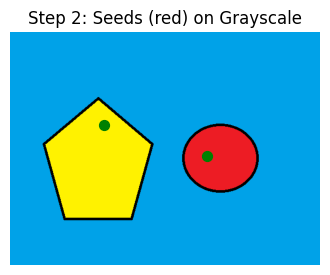

In [103]:

seeds = [(180, 180), (240, 380)] 
plt.figure(figsize=(4,4))
plt.imshow(img_rgb, cmap='gray')
plt.scatter([y for x, y in seeds], [x for x, y in seeds], c='green', s=50)
plt.title("Step 2: Seeds (red) on Grayscale")
plt.axis('off')


#### Step 4: Perform Region Growing Segmentation

In [104]:

tolerance = 15
mask = region_growing_color(img_rgb, seeds, tolerance)


#### Step 5: Display the Region-Grown Mask

(-0.5, 597.5, 449.5, -0.5)

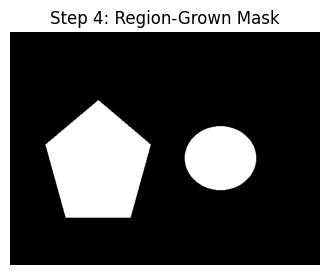

In [105]:

plt.figure(figsize=(4,4))
plt.imshow(mask, cmap='gray')
plt.title("Step 4: Region-Grown Mask")
plt.axis('off')


#### Step 6: Overlay Segmentation Mask on Original

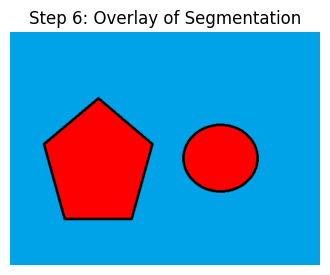

In [106]:
overlay = img_rgb.copy()
overlay[mask == 255] = [255, 0, 0]  # Color segmented region red

plt.figure(figsize=(4,4))
plt.imshow(overlay)
plt.title("Step 6: Overlay of Segmentation")
plt.axis('off')

plt.show()
